In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

# **1. Find the linear regression equation for this data.**

In [3]:
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [4]:
x=df[["Ground Temperature"]].values
y=df["Chirps/Second"].values


In [5]:
print(x)
print(y)

[[88.6]
 [71.6]
 [93.3]
 [84.3]
 [80.6]
 [75.2]
 [69.7]
 [71.6]
 [69.4]
 [83.3]
 [79.6]
 [82.6]
 [80.6]
 [83.5]
 [76.3]]
[20.  16.  19.8 18.4 17.1 15.5 14.7 15.7 15.4 16.3 15.  17.2 16.  17.
 14.4]


In [6]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [7]:
c=round(model.intercept_,2)
print(c)
m=model.coef_
m=round(m[0],2)
print(m)

0.46
0.2


In [8]:
print("The linear regression equation is : y={}*x + ({})".format(m,c))

The linear regression equation is : y=0.2*x + (0.46)


The linear regression equation is : y=0.2*x + (0.46)

## **2.Chart the original data and the equation on the chart.**

In [9]:
y_pred=model.predict(x)

In [10]:
data={"Original":y,"predicted from equation":y_pred}
dff=pd.DataFrame(data)
dff

,Original,predicted from equation
0,20.0,18.445091
1,16.0,14.994095
2,19.8,19.399190
3,18.4,17.572192
4,17.1,16.821093
5,15.5,15.724894
6,14.7,14.608396
7,15.7,14.994095
8,15.4,14.547496
9,16.3,17.369192


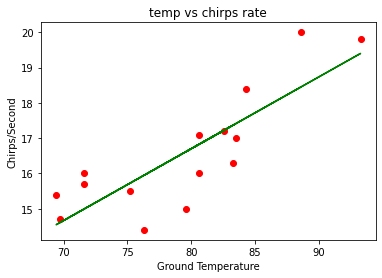

In [11]:
plt.scatter(x, y, color = "red")
plt.plot(x, y_pred, color = "green")
plt.title("temp vs chirps rate")
plt.xlabel("Ground Temperature")
plt.ylabel("Chirps/Second")
plt.show()

# **3.Find the equation's R2 score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)**

In [12]:
score=model.score(x,y)
print(score)
print(score*100,"%")

0.6922946529146998
69.22946529146998 %


The model score is 0.69, which is less than 0.8, indicating the equation is not a good fit for the data

# **4.Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?**

In [13]:
model.predict([[95]])

array([19.74428913])

If the ground temperature reached 95, then approximate rate at which the crickets chirping will be 19.74

# **5.Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?**

GIVEN:

 y=18, find x from y=mx+c ie; x=(y-c)/m

In [14]:
y=18
x=(y-c)/m
x

87.69999999999999

So, when when the chirping rate is 18, the probable ground temperature will be 87.69

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [15]:
df1= pd.read_fwf("brain_body.txt")
df1.shape

(62, 2)

# **1.Find the linear regression equation for this data for brain weight to body weight.**

In [16]:
x=df1[["Body"]].values
y=df1["Brain"].values

In [17]:
#since there is only 62 rows, not splitting into test and train
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [18]:
c=round(model.intercept_,2)
print(c)
m=model.coef_
m=round(m[0],2)
print(m)

-56.86
0.9


In [19]:
print("The linear regression equation is : y={}*x + ({})".format(m,c))

The linear regression equation is : y=0.9*x + (-56.86)


The linear regression equation is : y=0.9*x + (-56.86)

# **2.Chart the original data and the equation on the chart.**

In [20]:
y_pred=model.predict(x)

In [21]:
data={"Original":y,"predicted from equation":y_pred}
dff=pd.DataFrame(data)
dff

,Original,predicted from equation
0,3.385,-16.675919
1,0.480,-42.860395
2,1.350,-49.541951
3,465.000,325.076631
4,36.330,51.042552
...,...,...
57,160.000,95.736743
58,0.900,-54.507972
59,1.620,-46.562338
60,0.104,-54.598263


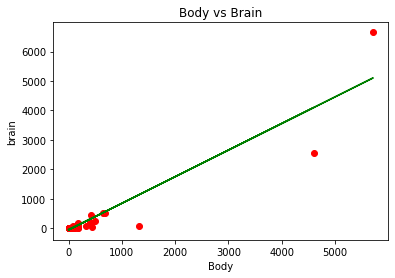

In [22]:
plt.scatter(x, y, color = "red")
plt.plot(x, y_pred, color = "green")
plt.title("Body vs Brain")
plt.xlabel("Body")
plt.ylabel("brain")
plt.show()

# **3.Find the equation's R2 score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)**

In [23]:
score=model.score(x,y)
print(score)
print(score*100,"%")

0.8726620843043331
87.26620843043331 %


The model score is 0.87, which is greater than 0.8, indicating the equation is a good fit for the data

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [24]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [25]:
df.shape

(52, 6)

# **1.Find the linear regression equation for this data using columns 1-5 to column 6.**

In [26]:
x=df[["Sex","Rank","Year","Degree","YSdeg"]].values
y=df["Salary"].values

In [27]:
#not splitting into test and train since only 52 rows are present
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [28]:
c=round(model.intercept_,2)
print(c)
m=model.coef_

11410.15


In [29]:
print("The linear regression equation is : y={}*x1+{}*x2+{}*x3+{}*x4+{}*x5+ + ({})".format(round(m[0],2),round(m[1],2),round(m[2],2),round(m[3],2),round(m[4],2),c))


The linear regression equation is : y=1241.79*x1+5586.18*x2+482.86*x3+-1331.64*x4+-128.79*x5+ + (11410.15)


The linear regression equation is : y=1241.79*x + (11410.15)

# **2.Find the selection of columns with the best R2 score.**

In [30]:
x1=df[['Sex']]
x2=df[['Rank']]
x3=df[['Year']]
x4=df[['Degree']]
x5=df[['YSdeg']]
y=df['Salary']

In [31]:
model1=model.fit(x1,y)
print('Score1: ',model.score(x1,y)*100)
model2=model.fit(x2,y)
print('Score2: ',model.score(x2,y)*100)
model3=model.fit(x3,y)
print('Score3: ',model.score(x3,y)*100)
model4=model.fit(x4,y)
print('Score4: ',model.score(x4,y)*100)
model5=model.fit(x5,y)
print('Score5: ',model.score(x5,y)*100)

Score1:  6.389892583288004
Score2:  75.25360539274632
Score3:  49.09370267692162
Score4:  0.48616809847483733
Score5:  45.54281345836028


# **3.Report whether sex is a factor in salary.**

In [32]:
x1=df[['Sex']]

model1=model.fit(x1,y)
print('Score1: ',model.score(x1,y)*100)

Score1:  6.389892583288004


R2 vaue of 'SEX' is 6.38, which is too low. so sex is not a factory in determining salary